In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


import warnings 
warnings.filterwarnings("ignore")


pd.set_option("display.max_columns", None)
 



In [2]:
pip install pandasql 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandasql as psql

In [4]:
data = pd.read_csv(r"C:\Users\velpu\Downloads\Credit score classification\train.csv",header=0)


In [5]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
data.shape

(100000, 28)

In [7]:
data = data.groupby('Credit_Score', group_keys=False).apply(lambda x: x.sample(frac=0.3))


In [8]:
data.shape

(29999, 28)

In [9]:
data = data.reset_index(drop=True)
data_bk = data.copy()

In [10]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x29c0,CUS_0xad9d,March,Valentina Zaf,23,#F%$D@*&8,Doctor,88133.16,7147.430000,2,4,6,0,NaN,11,5,9.5,0.0,Good,1073.99,31.698498,26 Years and 0 Months,No,0.000000,__10000__,Low_spent_Large_value_payments,509.76237605305033,Good
1,0x15bc3,CUS_0x8cdb,June,Lynnleys,51,712-28-1926,Manager,92650.2,7909.850000,5,2,3,3,"Auto Loan, Not Specified, and Auto Loan",1,0,8.65,6.0,Good,872.0,29.598838,17 Years and 1 Months,No,220.407164,1030.7596171149949,Low_spent_Small_value_payments,NaN,Good
2,0x20a0b,CUS_0x3aeb,June,Katyah,28,158-59-5725,_______,28207.03,2116.585833,8,7,10,0,NaN,21,9,15.48,10.0,Standard,1406.85,39.083603,16 Years and 7 Months,Yes,0.000000,49.4182248483673,High_spent_Medium_value_payments,412.24035848496595,Good
3,0x2138d,CUS_0xa4d0,April,Aruna Viswanathah,28,420-15-0166,Teacher,33535.89,2891.657500,4,5,7,1,Not Specified,8,0,5.43,1.0,_,970.22,28.199324,22 Years and 1 Months,No,18.093624,147.42024558512284,Low_spent_Medium_value_payments,403.65188000801965,Good
4,0xf816,CUS_0x3ae5,January,ac,36,708-01-2723,_______,127770.52,10430.543333,4,3,1,1,Credit-Builder Loan,9,10,-2.32,4.0,Good,1213.59,42.962232,28 Years and 5 Months,NM,92.251924,185.60353885269728,High_spent_Large_value_payments,1005.1988702788448,Good


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        29999 non-null  object 
 1   Customer_ID               29999 non-null  object 
 2   Month                     29999 non-null  object 
 3   Name                      26966 non-null  object 
 4   Age                       29999 non-null  object 
 5   SSN                       29999 non-null  object 
 6   Occupation                29999 non-null  object 
 7   Annual_Income             29999 non-null  object 
 8   Monthly_Inhand_Salary     25545 non-null  float64
 9   Num_Bank_Accounts         29999 non-null  int64  
 10  Num_Credit_Card           29999 non-null  int64  
 11  Interest_Rate             29999 non-null  int64  
 12  Num_of_Loan               29999 non-null  object 
 13  Type_of_Loan              26685 non-null  object 
 14  Delay_

In [12]:
data.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        3033
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       4454
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                3314
Delay_from_due_date            0
Num_of_Delayed_Payment      2111
Changed_Credit_Limit           0
Num_Credit_Inquiries         600
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          2722
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     1348
Payment_Behaviour              0
Monthly_Balance              370
Credit_Score                   0
dtype: int64

In [13]:
data.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x29c0,CUS_0xad9d,March,Valentina Zaf,23,#F%$D@*&8,Doctor,88133.16,7147.43,2,4,6,0,NaN,11,5,9.5,0.0,Good,1073.99,31.698498,26 Years and 0 Months,No,0.000000,__10000__,Low_spent_Large_value_payments,509.76237605305033,Good
1,0x15bc3,CUS_0x8cdb,June,Lynnleys,51,712-28-1926,Manager,92650.2,7909.85,5,2,3,3,"Auto Loan, Not Specified, and Auto Loan",1,0,8.65,6.0,Good,872.0,29.598838,17 Years and 1 Months,No,220.407164,1030.7596171149949,Low_spent_Small_value_payments,NaN,Good


In [14]:
data = data.drop(['ID','Customer_ID','Name','SSN'],axis=1)

In [15]:
data.shape

(29999, 24)

In [16]:
data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,March,23,Doctor,88133.16,7147.430000,2,4,6,0,NaN,11,5,9.5,0.0,Good,1073.99,31.698498,26 Years and 0 Months,No,0.000000,__10000__,Low_spent_Large_value_payments,509.76237605305033,Good
1,June,51,Manager,92650.2,7909.850000,5,2,3,3,"Auto Loan, Not Specified, and Auto Loan",1,0,8.65,6.0,Good,872.0,29.598838,17 Years and 1 Months,No,220.407164,1030.7596171149949,Low_spent_Small_value_payments,NaN,Good
2,June,28,_______,28207.03,2116.585833,8,7,10,0,NaN,21,9,15.48,10.0,Standard,1406.85,39.083603,16 Years and 7 Months,Yes,0.000000,49.4182248483673,High_spent_Medium_value_payments,412.24035848496595,Good
3,April,28,Teacher,33535.89,2891.657500,4,5,7,1,Not Specified,8,0,5.43,1.0,_,970.22,28.199324,22 Years and 1 Months,No,18.093624,147.42024558512284,Low_spent_Medium_value_payments,403.65188000801965,Good
4,January,36,_______,127770.52,10430.543333,4,3,1,1,Credit-Builder Loan,9,10,-2.32,4.0,Good,1213.59,42.962232,28 Years and 5 Months,NM,92.251924,185.60353885269728,High_spent_Large_value_payments,1005.1988702788448,Good


In [17]:
data.Month.unique()

array(['March', 'June', 'April', 'January', 'July', 'May', 'August',
       'February'], dtype=object)

In [18]:
data.Month.nunique()

8

In [19]:
data.Occupation.unique()

array(['Doctor', 'Manager', '_______', 'Teacher', 'Developer', 'Writer',
       'Entrepreneur', 'Journalist', 'Scientist', 'Architect',
       'Accountant', 'Engineer', 'Media_Manager', 'Mechanic', 'Lawyer',
       'Musician'], dtype=object)

In [20]:
data.Occupation.value_counts()

_______          2139
Lawyer           2009
Engineer         1944
Mechanic         1932
Architect        1909
Accountant       1868
Scientist        1861
Teacher          1854
Media_Manager    1851
Developer        1849
Journalist       1841
Doctor           1826
Manager          1818
Entrepreneur     1809
Musician         1764
Writer           1725
Name: Occupation, dtype: int64

In [21]:
data.Num_Bank_Accounts.unique()

array([   2,    5,    8,    4,    9,    1,    3,    7,    0,    6,   10,
        927,  184, 1419,   67, 1257,  338, 1734,   -1,  970,   77, 1012,
        170, 1488,  316,  243,  415,  212, 1650, 1656,  825,  480, 1395,
        460,  330,  158, 1323,  891,  918, 1041,  312, 1789,  795,   27,
       1739,  856,  476,  756,  443, 1680,  383, 1458, 1145,  313, 1114,
       1266,  340,  933,  974,  217,  526, 1502, 1060,  713,  931, 1184,
         28,  805,  105,  754, 1207,  980, 1657,  854,  616,  637,  777,
       1250,  514, 1001,  484, 1475,  157,  921, 1388, 1024, 1496,  851,
        676,  549, 1115,  912, 1391, 1468,  302,  610,  116,  839, 1051,
       1332, 1696, 1616,   34, 1462, 1647,  587, 1122,  186,  588,  997,
       1577,  229, 1067,  494,  197,  179, 1472, 1423,   43,  463, 1553,
        770,  944, 1387,  467, 1668, 1481,   38,  435,  622,  501,  847,
        244, 1793, 1779, 1252,  698,  230, 1733,  535,  624, 1564,  666,
        940, 1711, 1588, 1676,  307, 1569,  594,  8

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     29999 non-null  object 
 1   Age                       29999 non-null  object 
 2   Occupation                29999 non-null  object 
 3   Annual_Income             29999 non-null  object 
 4   Monthly_Inhand_Salary     25545 non-null  float64
 5   Num_Bank_Accounts         29999 non-null  int64  
 6   Num_Credit_Card           29999 non-null  int64  
 7   Interest_Rate             29999 non-null  int64  
 8   Num_of_Loan               29999 non-null  object 
 9   Type_of_Loan              26685 non-null  object 
 10  Delay_from_due_date       29999 non-null  int64  
 11  Num_of_Delayed_Payment    27888 non-null  object 
 12  Changed_Credit_Limit      29999 non-null  object 
 13  Num_Credit_Inquiries      29399 non-null  float64
 14  Credit

In [23]:
data.Credit_Score.unique()

array(['Good', 'Poor', 'Standard'], dtype=object)

In [24]:
data.isnull().sum()


Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       4454
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                3314
Delay_from_due_date            0
Num_of_Delayed_Payment      2111
Changed_Credit_Limit           0
Num_Credit_Inquiries         600
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          2722
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     1348
Payment_Behaviour              0
Monthly_Balance              370
Credit_Score                   0
dtype: int64

In [25]:

from sklearn.impute import SimpleImputer

imputer_si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

data['Monthly_Inhand_Salary'] = imputer_si.fit_transform(data[['Monthly_Inhand_Salary']])
data['Num_Credit_Inquiries'] = imputer_si.fit_transform(data[['Num_Credit_Inquiries']])
data['Monthly_Balance'] = imputer_si.fit_transform(data[['Monthly_Balance']])


In [26]:
data.isnull().sum()

Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                3314
Delay_from_due_date            0
Num_of_Delayed_Payment      2111
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          2722
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     1348
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     29999 non-null  object 
 1   Age                       29999 non-null  object 
 2   Occupation                29999 non-null  object 
 3   Annual_Income             29999 non-null  object 
 4   Monthly_Inhand_Salary     29999 non-null  float64
 5   Num_Bank_Accounts         29999 non-null  int64  
 6   Num_Credit_Card           29999 non-null  int64  
 7   Interest_Rate             29999 non-null  int64  
 8   Num_of_Loan               29999 non-null  object 
 9   Type_of_Loan              26685 non-null  object 
 10  Delay_from_due_date       29999 non-null  int64  
 11  Num_of_Delayed_Payment    27888 non-null  object 
 12  Changed_Credit_Limit      29999 non-null  object 
 13  Num_Credit_Inquiries      29999 non-null  float64
 14  Credit

In [28]:
data.Credit_Score.unique()

array(['Good', 'Poor', 'Standard'], dtype=object)

In [29]:
data.Monthly_Balance.unique()

array(['509.76237605305033', '__-333333333333333333333333333__',
       '412.24035848496595', ..., '367.66391921282286',
       '373.79478402948286', '894.8854777093782'], dtype=object)

In [30]:
data.Monthly_Balance.nunique()

29627

In [31]:
data.Credit_Score.nunique()

3

In [32]:
data.Monthly_Balance.value_counts()

__-333333333333333333333333333__    373
750.3120280285405                     1
213.88077673595018                    1
241.71368757129275                    1
1245.7680601383722                    1
                                   ... 
287.67353665658464                    1
536.1132230826943                     1
349.2801209014047                     1
342.8528023634502                     1
894.8854777093782                     1
Name: Monthly_Balance, Length: 29627, dtype: int64

In [33]:
data['Monthly_Balance'] = data['Monthly_Balance'].replace('__-333333333333333333333333333__','389.18903079092934')

In [34]:
data.Monthly_Balance.value_counts()

389.18903079092934    373
750.3120280285405       1
213.88077673595018      1
241.71368757129275      1
1245.7680601383722      1
                     ... 
287.67353665658464      1
536.1132230826943       1
349.2801209014047       1
342.8528023634502       1
894.8854777093782       1
Name: Monthly_Balance, Length: 29627, dtype: int64

In [35]:
data = data.drop(['Monthly_Balance'],axis=1)

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])


In [37]:
data.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Credit_Score                0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     29999 non-null  int32  
 1   Age                       29999 non-null  int32  
 2   Occupation                29999 non-null  int32  
 3   Annual_Income             29999 non-null  int32  
 4   Monthly_Inhand_Salary     29999 non-null  float64
 5   Num_Bank_Accounts         29999 non-null  int64  
 6   Num_Credit_Card           29999 non-null  int64  
 7   Interest_Rate             29999 non-null  int64  
 8   Num_of_Loan               29999 non-null  int32  
 9   Type_of_Loan              29999 non-null  int32  
 10  Delay_from_due_date       29999 non-null  int64  
 11  Num_of_Delayed_Payment    29999 non-null  int32  
 12  Changed_Credit_Limit      29999 non-null  int32  
 13  Num_Credit_Inquiries      29999 non-null  float64
 14  Credit

In [39]:
IndepVar = []
for col in data.columns:
    if col != 'Credit_Score':
        IndepVar.append(col)
TargetVar = 'Credit_Score'

x = data[IndepVar]
y = data[TargetVar]

In [40]:
x

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour
0,6,122,3,12949,7147.430000,2,4,6,1,5953,11,243,3493,0.0,1,457,31.698498,226,1,0.000000,27208,4
1,5,360,8,13287,7909.850000,5,2,3,81,411,1,6,3402,6.0,1,11157,29.598838,107,1,220.407164,501,6
2,5,168,15,5999,2116.585833,8,7,10,1,5953,21,271,1218,10.0,2,2623,39.083603,103,2,0.000000,18423,2
3,0,168,13,7166,2891.657500,4,5,7,3,3299,8,6,2975,1.0,3,11677,28.199324,179,1,18.093624,5236,5
4,3,235,15,1371,10430.543333,4,3,1,3,646,9,9,174,4.0,1,1242,42.962232,257,0,92.251924,8238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0,224,9,7506,3166.013333,2,5,7,3,4645,15,250,3048,3.0,1,8907,38.903719,128,1,17.806808,13584,5
29995,6,279,11,6042,1985.519313,1,5,4,92,3970,9,165,3222,3.0,1,9310,33.400037,135,1,144.715094,2719,4
29996,5,167,15,9292,4242.675000,6,5,34,148,104,39,85,3037,9.0,0,8004,39.445421,352,2,192.079991,2937,3
29997,7,59,11,8409,3054.456667,5,4,13,92,1084,26,271,2987,8.0,2,11071,26.754109,119,2,101.473790,27208,2


In [41]:
y

0        0
1        0
2        0
3        0
4        0
        ..
29994    2
29995    2
29996    2
29997    2
29998    2
Name: Credit_Score, Length: 29999, dtype: int32

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((23999, 22), (6000, 22), (23999,), (6000,))

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [44]:
x

array([[ 1.0991777 , -0.91174337, -0.97559748, ..., -0.17095811,
         1.46305697,  0.26099038],
       [ 0.66199862,  1.50722519,  0.10410078, ..., -0.14464778,
        -1.69118548,  1.24249348],
       [ 0.66199862, -0.44421163,  1.61567834, ..., -0.17095811,
         0.42550053, -0.72051273],
       ...,
       [ 0.66199862, -0.45437536,  1.61567834, ..., -0.14802924,
        -1.40348058, -0.22976118],
       [ 1.53635677, -1.55205857,  0.75191973, ..., -0.15884504,
         1.46305697, -0.72051273],
       [-0.6495386 , -0.15962709,  1.18379904, ..., -0.16287984,
        -0.37064836, -1.21126429]])

In [45]:
y

0        0
1        0
2        0
3        0
4        0
        ..
29994    2
29995    2
29996    2
29997    2
29998    2
Name: Credit_Score, Length: 29999, dtype: int32

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     29999 non-null  int32  
 1   Age                       29999 non-null  int32  
 2   Occupation                29999 non-null  int32  
 3   Annual_Income             29999 non-null  int32  
 4   Monthly_Inhand_Salary     29999 non-null  float64
 5   Num_Bank_Accounts         29999 non-null  int64  
 6   Num_Credit_Card           29999 non-null  int64  
 7   Interest_Rate             29999 non-null  int64  
 8   Num_of_Loan               29999 non-null  int32  
 9   Type_of_Loan              29999 non-null  int32  
 10  Delay_from_due_date       29999 non-null  int64  
 11  Num_of_Delayed_Payment    29999 non-null  int32  
 12  Changed_Credit_Limit      29999 non-null  int32  
 13  Num_Credit_Inquiries      29999 non-null  float64
 14  Credit

Multinominal Logistic Regression

[[ 303   49  253]
 [  23  697  432]
 [ 726 1042 2475]]
Print Class: 0
TP=303, FN=302, TN=4646, FP=749
Accuracy: 0.825
Precision: 0.288
Sensitivity: 0.501
F1-Score: 0.366
Specificity: 0.861
Balanced Accuracy: 0.681
MCC: 0.287

Print Class: 1
TP=697, FN=455, TN=3757, FP=1091
Accuracy: 0.742
Precision: 0.39
Sensitivity: 0.605
F1-Score: 0.474
Specificity: 0.775
Balanced Accuracy: 0.69
MCC: 0.327

Print Class: 2
TP=2475, FN=1768, TN=1072, FP=685
Accuracy: 0.591
Precision: 0.783
Sensitivity: 0.583
F1-Score: 0.669
Specificity: 0.61
Balanced Accuracy: 0.596
MCC: 0.176

Overall Performance Prediction:
Accuracy: 71.9333%
Precision: 48.7%
Recall or Sensitivity: 56.3%
F1-Score: 0.503
Specificity or True Nagative Rate: 74.8667%
Balanced Accuracy: 65.5667%

MCC: 0.2633

roc_auc_score: 0.744


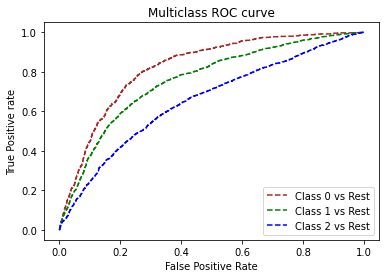

In [47]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

MHealthLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0)

# Train the model with training data

MHealthLR = MHealthLR.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthLR.predict(x_test)
y_pred_prob = MHealthLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
#

In [49]:
# Results

pd.set_option("display.max_rows", None)

PredResults = pd.DataFrame({'Credit_Score':lst_actual_class, 'Credit_Score':lst_predicted_class})

# Merge two Dataframes on index of both the dataframes

TestDataResults = x_test.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
3451,2,168,6,3560,5766.491667,5,4,8,3,5315,9,262,794,8.0,1,6937,36.131491,189,1,88.745543,8357,0,1
1805,6,122,10,11286,5766.491667,0,3,9,92,5917,10,84,2681,4.0,1,2125,39.628377,403,1,131.348312,21552,2,2
3382,0,202,13,12344,6877.585000,2,2,3,92,5213,3,2,1759,1.0,1,3757,41.024388,127,1,144.151019,21990,1,2
345,5,309,5,2721,1328.091250,3,7,7,1,5953,13,73,2719,5.0,3,7188,35.468380,326,1,0.000000,26753,5,2
4850,1,115,8,3998,5766.491667,4,3,10,3,2003,3,255,3367,2.0,3,894,36.491484,101,0,12.843522,27208,6,0
1815,3,297,13,8539,5766.491667,2,3,7,3,1335,7,6,2807,1.0,3,8287,28.672159,225,0,29.876241,17961,2,2
4843,1,94,9,3077,1113.453333,2,1,1,3,0,14,255,3544,6.0,1,10765,38.556478,318,1,6.898289,26376,6,2
4003,1,404,0,1196,5766.491667,2,5,7,92,1437,7,6,3441,4.0,1,7322,36.570660,196,1,260.184019,6542,2,0
5553,2,262,2,6956,2816.733333,10,10,29,148,302,32,129,1340,4.0,3,5816,30.934289,353,2,138.500003,22232,4,1
2982,0,177,6,5686,2047.446667,3,3,18,67,4641,14,62,1079,0.0,3,11344,34.884312,316,0,31.280029,16275,1,0


Multi Label Decision Tree Algorithm

[[ 545  107  412]
 [ 106 1074  603]
 [ 401  607 2145]]
Print Class: 0
TP=545, FN=519, TN=4429, FP=507
Accuracy: 0.829
Precision: 0.518
Sensitivity: 0.512
F1-Score: 0.515
Specificity: 0.897
Balanced Accuracy: 0.704
MCC: 0.411

Print Class: 1
TP=1074, FN=709, TN=3503, FP=714
Accuracy: 0.763
Precision: 0.601
Sensitivity: 0.602
F1-Score: 0.602
Specificity: 0.831
Balanced Accuracy: 0.716
MCC: 0.433

Print Class: 2
TP=2145, FN=1008, TN=1832, FP=1015
Accuracy: 0.663
Precision: 0.679
Sensitivity: 0.68
F1-Score: 0.68
Specificity: 0.643
Balanced Accuracy: 0.662
MCC: 0.324

Overall Performance Prediction:
Accuracy: 75.1667%
Precision: 59.9333%
Recall or Sensitivity: 59.8%
F1-Score: 0.599
Specificity or True Nagative Rate: 79.0333%
Balanced Accuracy: 69.4%

MCC: 0.3893

roc_auc_score: 0.694


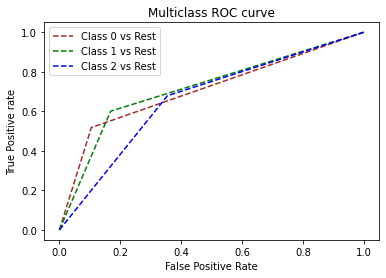

In [50]:
# To build the 'Multi Label Decision Tree' model with random sampling

from sklearn.tree import DecisionTreeClassifier

# Create an object for model

ModelDT = DecisionTreeClassifier()

# Train the model with training data

ModelDT = ModelDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
#

In [51]:
# Results

pd.set_option("display.max_rows", None)

PredResults = pd.DataFrame({'Credit_Score':lst_actual_class, 'Credit_Score':lst_predicted_class})

# Merge two Dataframes on index of both the dataframes

TestDataResults = x_test.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
17,6,94,4,327,8717.732500,0,3,1,0,3725,1,275,650,8.0,1,4986,39.329705,154,1,41394.000000,3795,1,2
5226,3,371,8,12011,6399.187500,3,5,5,92,1487,26,45,791,2.0,1,9557,36.149521,122,1,173.568558,10812,2,2
3710,4,279,12,3882,14647.123333,0,5,1,92,1742,7,255,3035,9.0,1,10009,30.358773,175,1,554.167274,12894,3,2
4845,0,152,4,12576,6148.311617,3,5,6,1,5953,25,250,802,4.0,2,10702,29.673716,140,2,882.930883,19610,6,1
2240,6,337,15,13480,7823.750000,2,4,6,1,5953,6,165,543,2.0,3,7931,43.901752,403,1,0.000000,26546,1,0
5746,5,160,11,12691,5766.491667,10,5,32,103,5261,44,156,1409,11.0,3,7728,30.042388,345,2,18.294948,24411,6,0
1807,5,262,13,7259,5766.491667,1,5,11,3,3299,5,165,2817,2.0,1,8844,26.260487,216,1,23.172582,3376,4,1
3703,4,288,10,12101,6332.683333,8,4,6,0,5953,21,16,866,3.0,2,10961,36.760852,131,2,0.000000,25073,1,2
4756,6,254,2,140,5766.491667,5,6,3213,92,5514,8,29,3180,1.0,1,1512,29.696254,403,1,211.047986,27140,0,2
1290,2,319,0,5230,1708.404583,5,4,7,0,3293,1,255,822,3.0,3,434,29.905060,219,1,21.292807,7096,1,1


Multi Label Random Forest Algorithm

[[ 689   83  304]
 [   7 1231  387]
 [ 356  474 2469]]
Print Class: 0
TP=689, FN=387, TN=4561, FP=363
Accuracy: 0.875
Precision: 0.655
Sensitivity: 0.64
F1-Score: 0.648
Specificity: 0.926
Balanced Accuracy: 0.783
MCC: 0.572

Print Class: 1
TP=1231, FN=394, TN=3818, FP=557
Accuracy: 0.842
Precision: 0.688
Sensitivity: 0.758
F1-Score: 0.721
Specificity: 0.873
Balanced Accuracy: 0.816
MCC: 0.612

Print Class: 2
TP=2469, FN=830, TN=2010, FP=691
Accuracy: 0.746
Precision: 0.781
Sensitivity: 0.748
F1-Score: 0.765
Specificity: 0.744
Balanced Accuracy: 0.746
MCC: 0.491

Overall Performance Prediction:
Accuracy: 82.1%
Precision: 70.8%
Recall or Sensitivity: 71.5333%
F1-Score: 0.7113
Specificity or True Nagative Rate: 84.7667%
Balanced Accuracy: 78.1667%

MCC: 0.5583

roc_auc_score: 0.871


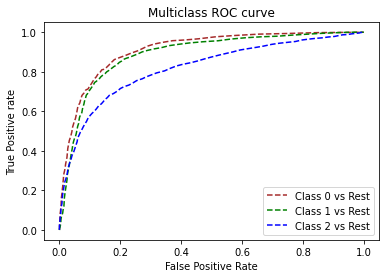

In [52]:
# To build the 'Multi Label Random Forest' model with random sampling

from sklearn.ensemble import RandomForestClassifier

# Create an object for model

ModelRF = RandomForestClassifier()

# Train the model with training data

ModelRF = ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
#

In [53]:
# Results

pd.set_option("display.max_rows", None)

PredResults = pd.DataFrame({'Credit_Score':lst_actual_class, 'Credit_Score':lst_predicted_class})

# Merge two Dataframes on index of both the dataframes

TestDataResults = x_test.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
5787,6,224,5,12520,568.673750,8,5,18,67,3945,6,16,1515,10.0,2,4339,27.266676,362,2,10.734358,13017,6,1
681,6,185,7,12733,7223.497500,1,4,1,67,3941,4,6,706,1.0,1,4009,23.860090,119,1,95.105426,25672,6,0
3230,3,309,3,8502,3440.244167,2,2,4,92,2663,7,22,2668,3.0,1,8767,35.339876,257,1,79880.000000,27209,6,2
4877,6,244,11,876,5766.491667,4,4,7,81,2784,9,16,794,3.0,1,10500,29.718923,137,1,149.597462,2066,6,2
3265,1,319,0,3254,12986.315524,5,1123,12,1,5953,13,6,713,4.0,1,8775,26.568010,403,1,1213.854476,26803,4,2
866,1,202,2,1546,5766.491667,7,5,9,92,5566,21,16,1183,12.0,2,10632,39.022485,403,2,37.779780,17941,5,0
3643,1,168,9,6000,2116.585833,8,7,10,1,5953,28,271,1218,10.0,2,2623,38.663983,403,2,0.000000,1995,3,1
2583,5,215,8,12928,7206.746667,4,3,4,67,2644,13,271,711,3.0,3,9925,36.262650,177,0,117.415282,10249,2,1
3268,3,288,15,11025,5417.858333,7,4,10,81,4245,25,271,3363,2.0,1,838,27.865417,272,1,124.053390,27208,2,0
3426,0,371,12,13183,7836.767500,1,6,2030,0,5310,8,271,2669,8.0,1,3998,24.466889,104,1,105.505251,18346,5,1


Multi Label Extra Trees Algorithm

[[ 664  109  329]
 [  12 1101  405]
 [ 376  578 2426]]
Print Class: 0
TP=664, FN=438, TN=4510, FP=388
Accuracy: 0.862
Precision: 0.631
Sensitivity: 0.603
F1-Score: 0.617
Specificity: 0.921
Balanced Accuracy: 0.762
MCC: 0.533

Print Class: 1
TP=1101, FN=417, TN=3795, FP=687
Accuracy: 0.816
Precision: 0.616
Sensitivity: 0.725
F1-Score: 0.666
Specificity: 0.847
Balanced Accuracy: 0.786
MCC: 0.544

Print Class: 2
TP=2426, FN=954, TN=1886, FP=734
Accuracy: 0.719
Precision: 0.768
Sensitivity: 0.718
F1-Score: 0.742
Specificity: 0.72
Balanced Accuracy: 0.719
MCC: 0.435

Overall Performance Prediction:
Accuracy: 79.9%
Precision: 67.1667%
Recall or Sensitivity: 68.2%
F1-Score: 0.675
Specificity or True Nagative Rate: 82.9333%
Balanced Accuracy: 75.5667%

MCC: 0.504

roc_auc_score: 0.851


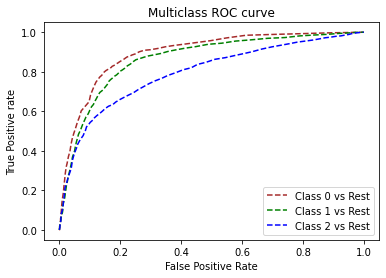

In [54]:
# To build the 'Multi Label Extra Trees' model with random sampling

from sklearn.ensemble import ExtraTreesClassifier

# Create an object for model

ModelET = ExtraTreesClassifier()

# Train the model with training data

ModelET = ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
#

In [55]:
# Results

pd.set_option("display.max_rows", None)

PredResults = pd.DataFrame({'Credit_Score':lst_actual_class, 'Credit_Score':lst_predicted_class})

# Merge two Dataframes on index of both the dataframes

TestDataResults = x_test.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
3978,6,224,6,10375,5044.243333,0,1,11,92,4186,14,250,3247,0.0,1,2054,39.475112,197,1,159.799347,27209,2,2
4343,4,94,7,13414,8043.110000,3,7,7,92,3190,22,62,3131,3.0,2,9461,30.566628,296,0,181.034099,6530,1,2
278,6,152,7,4204,1330.922917,2,7,4,92,2411,11,22,3489,0.0,1,4086,24.069968,184,1,57.801813,4832,6,2
1723,2,262,13,6773,2703.896667,2,4,7,67,5945,4,262,841,71.0,1,11216,33.439329,90,1,27.407887,27208,3,0
4480,3,418,6,2138,1385.697500,3,5,10,67,4644,14,8,2985,2.0,1,5719,33.489735,263,1,21.081389,4446,6,2
3931,3,244,9,5269,1499.214583,1,3,4,3,2003,4,275,3127,4.0,1,11212,34.118148,259,1,11.614217,7821,1,1
5211,7,297,12,5271,5766.491667,6,7,17,67,5312,28,45,3437,4.0,2,9772,31.505640,315,1,18.878098,12368,1,0
1406,6,309,2,1321,10543.416667,3,1,1024,81,3209,14,0,229,1.0,1,9647,30.922322,137,1,272.281436,27208,3,0
1994,7,168,10,5433,2136.219167,5,4,6,67,2643,4,22,3278,3.0,1,8457,24.035082,182,1,25.053047,11427,6,2
3592,4,202,10,3177,13868.616667,0,3,2,3,2003,4,27,3201,0.0,1,8897,37.083268,191,1,81.552423,18308,2,1


Multi Label KNN Algorithm

[[ 263  182  503]
 [ 155  775  760]
 [ 634  831 1897]]
Print Class: 0
TP=263, FN=685, TN=4263, FP=789
Accuracy: 0.754
Precision: 0.25
Sensitivity: 0.277
F1-Score: 0.263
Specificity: 0.844
Balanced Accuracy: 0.56
MCC: 0.116

Print Class: 1
TP=775, FN=915, TN=3297, FP=1013
Accuracy: 0.679
Precision: 0.433
Sensitivity: 0.459
F1-Score: 0.446
Specificity: 0.765
Balanced Accuracy: 0.612
MCC: 0.22

Print Class: 2
TP=1897, FN=1465, TN=1375, FP=1263
Accuracy: 0.545
Precision: 0.6
Sensitivity: 0.564
F1-Score: 0.582
Specificity: 0.521
Balanced Accuracy: 0.542
MCC: 0.085

Overall Performance Prediction:
Accuracy: 65.9333%
Precision: 42.7667%
Recall or Sensitivity: 43.3333%
F1-Score: 0.4303
Specificity or True Nagative Rate: 71.0%
Balanced Accuracy: 57.1333%

MCC: 0.1403

roc_auc_score: 0.615


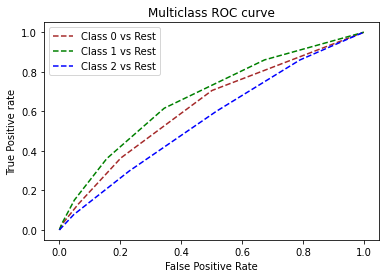

In [56]:
# To build the 'Multi Label Extra Trees' model with random sampling

from sklearn.neighbors import KNeighborsClassifier

# Create an object for model

ModelKNN = KNeighborsClassifier(n_neighbors=5)

# Train the model with training data

ModelKNN = ModelKNN.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelKNN.predict(x_test)
y_pred_prob = ModelKNN.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
#

In [57]:
# Results

pd.set_option("display.max_rows", None)

PredResults = pd.DataFrame({'Credit_Score':lst_actual_class, 'Credit_Score':lst_predicted_class})

# Merge two Dataframes on index of both the dataframes

TestDataResults = x_test.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
1412,2,202,1,8942,3541.536667,1,4,12,81,2285,13,84,3212,1.0,1,10970,36.541708,313,1,84.469820,23483,1,0
1483,0,76,10,262,8421.817159,5,6,14,92,2888,12,29,1074,6.0,2,8252,23.712894,403,2,596.337014,20232,3,2
647,1,196,5,7402,2654.882500,5,5,16,81,2279,10,62,654,4.0,2,248,36.763337,403,1,85.658795,24798,4,1
5210,4,87,10,498,5766.491667,5,628,5,92,5192,12,255,3168,2.0,3,14,34.695100,217,1,263.093366,10342,4,0
516,3,185,2,3151,5766.491667,1,3,8,67,3294,13,165,3544,3.0,1,11138,39.601813,403,1,189.466210,16093,2,2
964,6,185,5,6920,2999.231667,6,5,2,0,4638,25,38,2655,1.0,1,515,39.620784,179,0,32.366285,20316,2,2
1731,0,288,3,4013,1259.852917,2,2,3,104,5953,4,250,1823,3.0,1,2166,23.411563,184,1,0.000000,27209,5,2
5532,5,309,3,10571,5371.525000,2,5,8,81,3505,5,250,3419,5.0,1,2389,43.026217,184,1,87.791201,15981,1,1
878,2,262,12,11657,6241.813333,2,4,10,1,5953,10,250,2919,3.0,1,2156,30.490252,236,1,0.000000,10916,5,2
2201,7,337,2,7474,3045.354167,6,7,16,1,5953,8,29,3329,1.0,2,2304,35.282637,200,1,0.000000,7000,3,2


Multi Label GaussianNB Algorithm

[[ 617  177  621]
 [  41  910  609]
 [ 394  701 1930]]
Print Class: 0
TP=617, FN=798, TN=4150, FP=435
Accuracy: 0.794
Precision: 0.587
Sensitivity: 0.436
F1-Score: 0.5
Specificity: 0.905
Balanced Accuracy: 0.67
MCC: 0.381

Print Class: 1
TP=910, FN=650, TN=3562, FP=878
Accuracy: 0.745
Precision: 0.509
Sensitivity: 0.583
F1-Score: 0.544
Specificity: 0.802
Balanced Accuracy: 0.692
MCC: 0.37

Print Class: 2
TP=1930, FN=1095, TN=1745, FP=1230
Accuracy: 0.612
Precision: 0.611
Sensitivity: 0.638
F1-Score: 0.624
Specificity: 0.587
Balanced Accuracy: 0.612
MCC: 0.225

Overall Performance Prediction:
Accuracy: 71.7%
Precision: 56.9%
Recall or Sensitivity: 55.2333%
F1-Score: 0.556
Specificity or True Nagative Rate: 76.4667%
Balanced Accuracy: 65.8%

MCC: 0.3253

roc_auc_score: 0.736


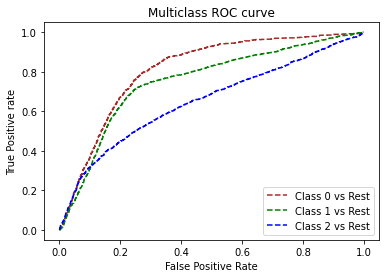

In [58]:
# To build the 'Multi Label GaussianNB Algorithm' model with random sampling

from sklearn.naive_bayes import GaussianNB

# Create an object for model

ModelGNB = GaussianNB()

# Train the model with training data

ModelGNB = ModelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelGNB.predict(x_test)
y_pred_prob = ModelGNB.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
#

In [59]:
# Results

pd.set_option("display.max_rows", None)

PredResults = pd.DataFrame({'Credit_Score':lst_actual_class, 'Credit_Score':lst_predicted_class})

# Merge two Dataframes on index of both the dataframes

TestDataResults = x_test.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
1147,0,386,10,7097,2510.616667,6,5,17,1,5953,28,54,2645,5.0,2,350,36.489151,134,1,0.000000,24519,2,2
346,2,142,15,5964,2397.433333,0,7,4,1,5953,6,271,2976,0.0,1,9896,32.080418,268,1,0.000000,26700,6,1
1741,7,224,7,9777,4860.856667,5,4,10,67,5307,7,16,3328,4.0,1,6022,40.756527,167,1,76.221034,10105,3,0
2320,5,60,15,8233,3075.464910,5,4,9,67,5946,8,271,2875,1.0,1,1701,27.606247,326,1,403.731807,16649,6,0
5513,6,152,9,12435,6625.681667,0,5,4,81,3507,22,22,742,4.0,1,8063,26.196520,403,1,133.893759,14761,4,0
199,5,301,7,11277,5805.536667,0,1,4,92,3340,15,9,4,2.0,1,3202,31.534958,201,0,164.456949,4823,3,2
5312,0,371,13,7643,3074.589167,2,4,1,1,5953,0,262,830,4.0,3,9999,30.619210,403,1,0.000000,5458,5,0
4472,4,135,10,12952,973.636667,10,8,16,117,1411,19,68,2439,6.0,0,7656,28.075268,147,0,41.106397,21710,5,2
3394,4,288,7,8750,3595.013333,0,4,9,67,5311,3,275,3145,4.0,1,1935,29.835728,221,1,55.487641,13468,5,2
1487,4,371,11,12047,5766.491667,1,1,6,81,5013,2,216,3279,8.0,1,8200,29.339877,235,0,111.155884,27209,1,1


In [60]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Multi Label XGBClassifier Algorithm

[[ 664   96  320]
 [  16 1025  366]
 [ 372  667 2474]]
Print Class: 0
TP=664, FN=416, TN=4532, FP=388
Accuracy: 0.866
Precision: 0.631
Sensitivity: 0.615
F1-Score: 0.623
Specificity: 0.921
Balanced Accuracy: 0.768
MCC: 0.541

Print Class: 1
TP=1025, FN=382, TN=3830, FP=763
Accuracy: 0.809
Precision: 0.573
Sensitivity: 0.729
F1-Score: 0.642
Specificity: 0.834
Balanced Accuracy: 0.782
MCC: 0.521

Print Class: 2
TP=2474, FN=1039, TN=1801, FP=686
Accuracy: 0.712
Precision: 0.783
Sensitivity: 0.704
F1-Score: 0.741
Specificity: 0.724
Balanced Accuracy: 0.714
MCC: 0.423

Overall Performance Prediction:
Accuracy: 79.5667%
Precision: 66.2333%
Recall or Sensitivity: 68.2667%
F1-Score: 0.6687
Specificity or True Nagative Rate: 82.6333%
Balanced Accuracy: 75.4667%

MCC: 0.495

roc_auc_score: 0.849


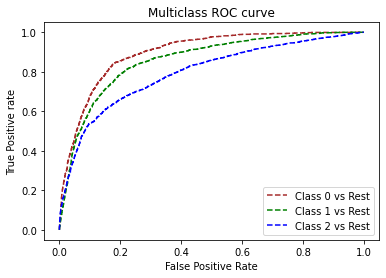

In [61]:
# To build the 'Multi Label XGBClassifier Algorithm' model with random sampling

from xgboost import XGBClassifier

# Create an object for model

ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')


# Train the model with training data

ModelXGB = ModelXGB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelXGB.predict(x_test)
y_pred_prob = ModelXGB.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
#

In [62]:
# Results

pd.set_option("display.max_rows", None)

PredResults = pd.DataFrame({'Credit_Score':lst_actual_class, 'Credit_Score':lst_predicted_class})

# Merge two Dataframes on index of both the dataframes

TestDataResults = x_test.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
5236,6,382,9,8527,3177.995000,4,5,2,3,3949,5,6,567,9.0,3,10169,37.307807,209,1,31.729113,27208,2,2
3942,6,87,10,2137,964.621250,3,3,2571,92,1923,14,216,3094,1.0,1,6820,26.575972,137,1,41.695445,13968,4,2
4556,1,202,13,3263,1194.366670,2,4,5,1,5953,11,250,2813,3.0,1,1612,29.036362,228,0,97.912080,19238,2,2
1109,5,168,8,12203,6393.528333,3,1,10,92,849,15,243,1748,2.0,1,9150,31.286291,212,1,261.474800,14270,5,1
4783,5,94,4,4237,1782.631667,5,3,8,0,4989,3,243,3522,0.0,1,4229,24.250250,228,1,50.856245,10381,6,2
3316,1,114,15,1056,9968.970000,2,7,8,67,3946,15,84,3187,8.0,1,9610,38.858803,109,1,129.178003,27208,0,2
5729,3,152,9,7011,2499.325833,1,3,1,2,5953,14,216,771,2.0,1,10037,25.019623,136,1,0.000000,8476,1,2
4047,7,185,0,2740,7504.867500,4,4,12,3,2648,2,165,3454,3.0,1,9894,35.513485,93,1,47.817248,8822,2,1
2622,0,135,10,12952,973.636667,10,8,16,117,1411,15,68,2439,6.0,0,7656,28.513213,403,2,41.106397,22268,6,1
3541,4,167,13,11690,6186.016667,5,5,15,67,5308,16,73,1004,6.0,3,3918,27.971753,61,2,77.651195,19835,5,2


In [64]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


Multi Label LGB Algorithm

[LightGBM] [Warning] Unknown parameter: n_neighbors
[[ 708   90  342]
 [  17 1119  399]
 [ 327  579 2419]]
Print Class: 0
TP=708, FN=432, TN=4516, FP=344
Accuracy: 0.871
Precision: 0.673
Sensitivity: 0.621
F1-Score: 0.646
Specificity: 0.929
Balanced Accuracy: 0.775
MCC: 0.568

Print Class: 1
TP=1119, FN=416, TN=3796, FP=669
Accuracy: 0.819
Precision: 0.626
Sensitivity: 0.729
F1-Score: 0.673
Specificity: 0.85
Balanced Accuracy: 0.79
MCC: 0.553

Print Class: 2
TP=2419, FN=906, TN=1934, FP=741
Accuracy: 0.726
Precision: 0.766
Sensitivity: 0.728
F1-Score: 0.746
Specificity: 0.723
Balanced Accuracy: 0.726
MCC: 0.448

Overall Performance Prediction:
Accuracy: 80.5333%
Precision: 68.8333%
Recall or Sensitivity: 69.2667%
F1-Score: 0.6883
Specificity or True Nagative Rate: 83.4%
Balanced Accuracy: 76.3667%

MCC: 0.523

roc_auc_score: 0.865


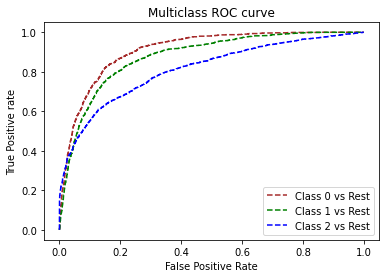

In [65]:
# To build the 'Multi Label LGB Algorithm' model with random sampling

import lightgbm as lgb

# Create an object for model

ModelLGB = lgb.LGBMClassifier(n_neighbors=5)

# Train the model with training data

ModelLGB = ModelLGB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelLGB.predict(x_test)
y_pred_prob = ModelLGB.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
#

In [66]:
# Results

pd.set_option("display.max_rows", None)

PredResults = pd.DataFrame({'Credit_Score':lst_actual_class, 'Credit_Score':lst_predicted_class})

# Merge two Dataframes on index of both the dataframes

TestDataResults = x_test.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
960,1,244,9,12445,6661.253333,3,5,8,92,2241,14,38,597,4.0,3,1273,34.230021,325,1,162.108956,12617,4,2
1603,3,202,13,7431,5766.491667,1,2,6,81,3933,3,250,3420,1.0,1,47,34.872707,161,1,79.568132,10794,5,2
5045,4,87,1,6422,2525.584167,4,2,2,3,5315,12,275,3480,4.0,1,10858,34.407579,260,1,20.510681,27209,6,0
3901,5,235,9,5276,5766.491667,5,3,5,3,2003,1,21,2612,0.0,1,2601,27.177119,297,1,9.742872,17804,2,2
2540,0,354,8,5374,5766.491667,2,5,5,3,2003,7,275,798,4.0,3,10304,35.888925,233,1,18.407981,23876,3,0
2602,5,202,11,12341,6537.266667,5,5,6,3,2003,13,262,2983,5.0,1,8661,39.936233,261,0,42.529595,22455,1,2
1644,3,76,12,3963,1780.917917,0,5,6,3,2648,7,216,2890,3.0,1,10718,32.588151,245,1,8.350875,23446,2,2
3580,2,115,15,7561,3058.569167,5,5,5,67,1999,28,16,3517,1.0,1,11190,23.629355,297,1,31.427239,1473,2,2
4902,0,87,11,9433,4239.426667,7,6,10,67,4638,25,38,2859,4.0,1,8507,36.019381,318,0,72.745057,2155,2,2
3441,5,196,1,306,8986.915000,5,1,3,92,3642,8,250,702,2.0,3,10102,25.412645,328,0,340.104957,11242,2,2
